In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv('BTC-USD.csv')
data.dropna

<bound method DataFrame.dropna of             Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2500  2021-07-22  32138.873047  32576.400391  31745.298828  32313.105469   
2501  2021-07-23  32305.958984  33581.550781  32057.892578  33581.550781   
2502  2021-07-24  33593.730469  34490.390625  33424.859375  34292.445313   
2503  2021-07-25  34290.292969  35364.925781  33881.835938  35350.187500   
2504  2021-07-26  35287.312500  39061.367188  35287.312500  39061.367188   

         Adj Close        Volume  
0       457.334015

In [66]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [67]:
data = data.set_index('Date')
data_freq = data.asfreq('D', method='ffill')
print(data.head())
print(data.index)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0  
2014-09-19  37919700.0  
2014-09-20  36863600.0  
2014-09-21  26580100.0  
DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2

In [68]:
forecast_out = int(1)
data['Prediction'] = data[['Adj Close']].shift(-forecast_out)

In [69]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,32313.105469,1.955523e+10,33581.550781
2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,33581.550781,2.255205e+10,34292.445313
2021-07-24,33593.730469,34490.390625,33424.859375,34292.445313,34292.445313,2.166471e+10,35350.187500
2021-07-25,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,2.085669e+10,39061.367188
2021-07-26,35287.312500,39061.367188,35287.312500,39061.367188,39061.367188,3.519676e+10,NaN


C:\Users\Wesley\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


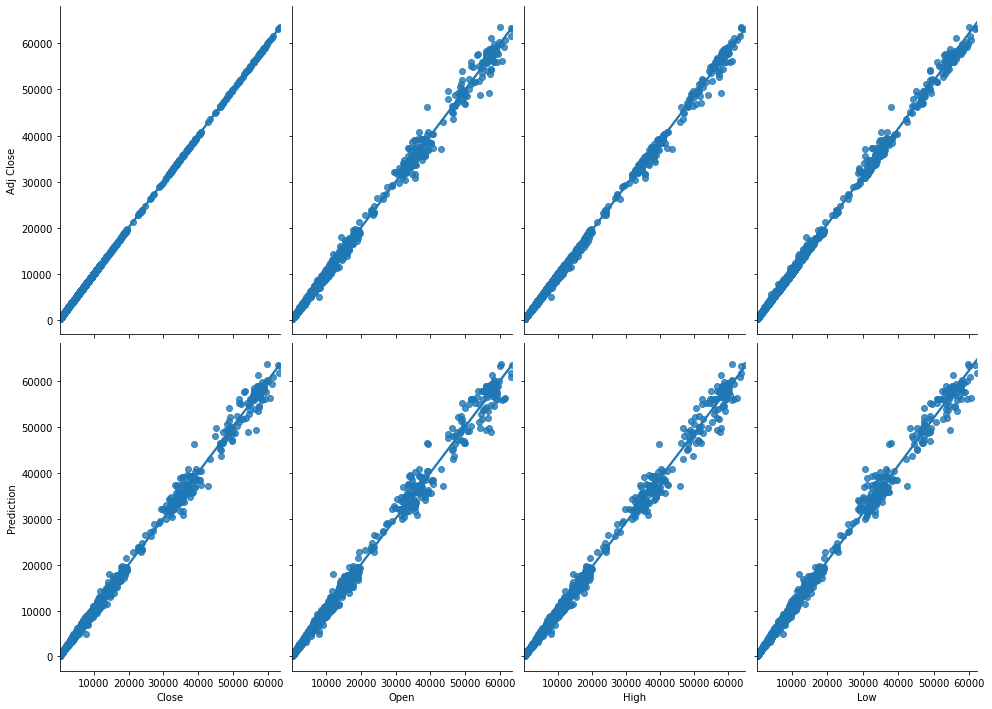

In [70]:
sns.pairplot(data, x_vars=['Close', 'Open', 'High', 'Low'], y_vars=['Adj Close', 'Prediction'], aspect=.7, height=5, kind='reg')

In [71]:
from sklearn import preprocessing
feature_cols = ['Adj Close']
data = data.dropna()
X = data[feature_cols]
X = preprocessing.scale(X)
Pred_data = data[-forecast_out:]
X = X[:-forecast_out]
y = data['Prediction'][:-forecast_out]
print(y)

Date
2014-09-17      424.440002
2014-09-18      394.795990
2014-09-19      408.903992
2014-09-20      398.821014
2014-09-21      402.152008
                  ...     
2021-07-20    32110.693359
2021-07-21    32313.105469
2021-07-22    33581.550781
2021-07-23    34292.445313
2021-07-24    35350.187500
Name: Prediction, Length: 2496, dtype: float64


In [72]:
print(X.shape)
print(y.shape)

(2496, 1)
(2496,)


In [73]:
np.unique(X)

array([-0.65755515, -0.65581483, -0.65508791, ...,  4.51905508,
        4.53586169,  4.55144503])

In [74]:
np.unique(y)

array([  178.102997,   199.259995,   208.097   , ..., 63109.695313,
       63314.011719, 63503.457031])

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
logreg = LinearRegression()

In [77]:
scores = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(np.sqrt(scores.mean()))

nan


C:\Users\Wesley\AppData\Local\Temp/ipykernel_5372/3587662772.py:2: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(scores.mean()))
